## Import modules

### Autor: Katarzyna Bielecka

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from functions import metrics, k_fold, create_numerical_categories

from forestsvm import DecisionTreeID3, RandomForestClassifier as RFC

## Preprocess data

### Mushrooms dataset

read mushrooms file

In [59]:
f = "../datasets/data_agaricus_lepiota.data"
df = pd.read_csv(f, engine='python')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [60]:
df.rename(columns = {'p':'label'}, inplace = True)

df["label"].loc[lambda x: x == "e"] = "edible"
df["label"].loc[lambda x: x == "p"] = "poisonous"

df["label"].head()

0       edible
1       edible
2    poisonous
3       edible
4       edible
Name: label, dtype: object

#### encode class variable

In [61]:
df['label'] = df["label"].apply(lambda x: 1 if x == 'edible' else 0) 

In [62]:
df.head()

,label,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [63]:
for col in df.columns:
    print(f"{df[col].name}: {df[col].unique()}")

label: [1 0]
x: ['x' 'b' 's' 'f' 'k' 'c']
s: ['s' 'y' 'f' 'g']
n: ['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
t: ['t' 'f']
p.1: ['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
f: ['f' 'a']
c: ['c' 'w']
n.1: ['b' 'n']
k: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
e: ['e' 't']
e.1: ['c' 'e' 'b' 'r' '?']
s.1: ['s' 'f' 'k' 'y']
s.2: ['s' 'f' 'y' 'k']
w: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
w.1: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
p.2: ['p']
w.2: ['w' 'n' 'o' 'y']
o: ['o' 't' 'n']
p.3: ['p' 'e' 'l' 'f' 'n']
k.1: ['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
s.3: ['n' 's' 'a' 'v' 'y' 'c']
u: ['g' 'm' 'u' 'd' 'p' 'w' 'l']


In [64]:
df_mushrooms = df.copy()

### Tic-tac-toe dataset

In [9]:
f = "../datasets/data_tic_tac_toe.data"
df_tic = pd.read_csv(f, engine='python')
df_tic.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive


In [10]:
for col in df_tic.columns:
    print(f"{df_tic[col].name}: {df_tic[col].unique()}")

x: ['x' 'o' 'b']
x.1: ['x' 'o' 'b']
x.2: ['x' 'o' 'b']
x.3: ['x' 'o' 'b']
o: ['o' 'b' 'x']
o.1: ['o' 'b' 'x']
x.4: ['o' 'b' 'x']
o.2: ['x' 'o' 'b']
o.3: ['o' 'x' 'b']
positive: ['positive' 'negative']


In [11]:
columns = ['x','x.1','x.2','x.3','o','o.1','o.2','o.3','x.4']
result_dict = {'x':1, 'o':2, 'b':3}

for col in columns:
    df_tic[col] = df_tic[col].map(result_dict)
df_tic.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,1,1,1,1,2,2,2,1,2,positive
1,1,1,1,1,2,2,2,2,1,positive
2,1,1,1,1,2,2,2,3,3,positive
3,1,1,1,1,2,2,3,2,3,positive
4,1,1,1,1,2,2,3,3,2,positive


In [12]:
df_tic.rename(columns = {'positive':'label'}, inplace = True)

In [13]:
df_tic['label'] = df_tic['label'].apply(lambda x: 1 if x=='positive' else 0)
df_tic['label'].unique()
df_tic['label']

0      1
1      1
2      1
3      1
4      1
      ..
952    0
953    0
954    0
955    0
956    0
Name: label, Length: 957, dtype: int64

In [14]:
for col in df_tic.columns:
    print(f"{df_tic[col].name}: {df_tic[col].unique()}")

x: [1 2 3]
x.1: [1 2 3]
x.2: [1 2 3]
x.3: [1 2 3]
o: [2 3 1]
o.1: [2 3 1]
x.4: [2 3 1]
o.2: [1 2 3]
o.3: [2 1 3]
label: [1 0]


In [15]:
df_tic.head()

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,label
0,1,1,1,1,2,2,2,1,2,1
1,1,1,1,1,2,2,2,2,1,1
2,1,1,1,1,2,2,2,3,3,1
3,1,1,1,1,2,2,3,2,3,1
4,1,1,1,1,2,2,3,3,2,1


### Covid-19 patients dataset

In [16]:
f = "../datasets/data_covid.csv"
df = pd.read_csv(f)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


##### remove missing values from the columns that will create the covid_risk column

97 and 99 values mean missing data. 1 is boolean 0 and 2 is boolean 1. So we just leave 1's and 2's.

In [17]:
df = df.loc[(df["INTUBED"] == 1) | (df["INTUBED"] == 2)]
df = df.loc[(df["ICU"] == 1) | (df["ICU"]  == 2)]

In [18]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2


In [19]:
df["DATE_DIED"] = df["DATE_DIED"].apply(lambda x: 0 if x == "9999-99-99" else 1) 
df["INTUBED"] = df["INTUBED"].apply(lambda x: 1 if x == 1 else 0) 
df["ICU"] = df["ICU"].apply(lambda x: 1 if x == 1 else 0) 

In [20]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
2,2,1,2,2,1,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,0
5,2,1,1,2,0,0,1,40,2,2,...,2,2,2,2,2,2,2,2,3,0
8,2,1,1,2,0,0,2,37,2,1,...,2,2,1,2,2,1,2,2,3,0


In [21]:
df['AT_RISK'] = df['DATE_DIED'] + df['INTUBED'] + df['ICU']
df['AT_RISK'] = df["AT_RISK"].apply(lambda x: 1 if x > 0 else 0) 

df = df.drop(columns=["DATE_DIED", "INTUBED", "ICU"])

In [22]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK
2,2,1,2,2,2,55,97,1,2,2,2,2,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,0
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,0


#### encode other columns

In [23]:
columns = ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

for col in columns:
    df = df[df[col].isin([1,2])]
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK
2,2,1,2,2,2,55,97,1,2,2,2,2,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,0
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,0
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,0
11,2,1,2,2,2,24,97,2,2,2,2,2,2,2,2,2,2,3,0


In [24]:
df.PREGNANT = df.PREGNANT.replace(98, 2)
df.PREGNANT = df.PREGNANT.replace(97, 2)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
5,2,1,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,0
8,2,1,1,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,0
9,2,1,1,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,0
11,2,1,2,2,2,24,2,2,2,2,2,2,2,2,2,2,2,3,0


In [25]:
columns = ['SEX','USMER','PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO', 'PREGNANT', 'PATIENT_TYPE']
for col in columns:
    df[col] = df[col].apply(lambda x: 0 if x==2 else 1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK
2,0,1,0,0,0,55,0,1,0,0,0,0,0,0,0,0,0,3,1
5,0,1,1,0,1,40,0,0,0,0,0,0,0,0,0,0,0,3,0
8,0,1,1,0,0,37,0,1,0,0,0,1,0,0,1,0,0,3,0
9,0,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3,0
11,0,1,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,3,0


In [26]:
for col in df.columns:
    print(f"{df[col].name}: {df[col].unique()}")

USMER: [0 1]
MEDICAL_UNIT: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX: [0 1]
PATIENT_TYPE: [0]
PNEUMONIA: [0 1]
AGE: [ 55  40  37  25  24  30  80  59  45  16  56  58  48  36  27  90  46  14
   0  17   2  10   1  12   7   4   8   6  15  43  64  54  49  88  47  86
  53  61  73  87  60  42  72  63  62  74  83  57  68  84  66  26  70  65
  75  79  50  82  51  67  69  77  92  52  78  71  76  32  39  41  20  44
  81  38  85  23  89  31  34   3  97  93  95  35   5  91  33  29  28 103
  13  22   9  18  21  11  96  19  98  99  94 100 101 109 105 104 106 102
 118 115]
PREGNANT: [0 1]
DIABETES: [1 0]
COPD: [0 1]
ASTHMA: [0 1]
INMSUPR: [0 1]
HIPERTENSION: [0 1]
OTHER_DISEASE: [0 1]
CARDIOVASCULAR: [0 1]
OBESITY: [0 1]
RENAL_CHRONIC: [0 1]
TOBACCO: [0 1]
CLASIFFICATION_FINAL: [3 7 6 5 1 2 4]
AT_RISK: [1 0]


#### encode age column

In [27]:
bins = [0, 2, 18, 35,50, 65,80, np.inf]
names = ['<2', '2-18', '18-35','35-50', '50-65', '65-80','80+']
df['AGE_RANGE'] = pd.cut(df['AGE'], bins, labels=names)
df['AGE_RANGE'].dtype
df = df.drop(columns=["AGE"])

In [28]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK,AGE_RANGE
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1,50-65
5,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,35-50
8,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,3,0,35-50
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,18-35
11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,18-35


In [29]:
import category_encoders as ce 

oe = ce.OrdinalEncoder(cols = ['AGE_RANGE'], return_df= False, 
mapping = [{'col':'AGE_RANGE', 'mapping' : {'<2':1, '2-18':2, '18-35':3,'35-50':4, '50-65':5, '65-80':6,'80+':7}}])

df['AGE'] = oe.fit_transform(df['AGE_RANGE'])
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,AT_RISK,AGE_RANGE,AGE
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1,50-65,5.0
5,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,35-50,4.0
8,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,3,0,35-50,4.0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,18-35,3.0
11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,18-35,3.0


In [30]:
df = df.drop(columns=['AGE_RANGE'])

In [31]:
df['AGE'] = df['AGE'].astype('int64')

In [32]:
df.AGE.dtype

dtype('int64')

In [33]:
df.rename(columns = {'AT_RISK':'label'}, inplace = True)

In [34]:
df_covid = df.copy()

In [35]:
df_covid = df_covid.reset_index()

In [36]:
df_covid = df_covid.drop(columns=['index'])
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189586 entries, 0 to 189585
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   USMER                 189586 non-null  int64
 1   MEDICAL_UNIT          189586 non-null  int64
 2   SEX                   189586 non-null  int64
 3   PATIENT_TYPE          189586 non-null  int64
 4   PNEUMONIA             189586 non-null  int64
 5   PREGNANT              189586 non-null  int64
 6   DIABETES              189586 non-null  int64
 7   COPD                  189586 non-null  int64
 8   ASTHMA                189586 non-null  int64
 9   INMSUPR               189586 non-null  int64
 10  HIPERTENSION          189586 non-null  int64
 11  OTHER_DISEASE         189586 non-null  int64
 12  CARDIOVASCULAR        189586 non-null  int64
 13  OBESITY               189586 non-null  int64
 14  RENAL_CHRONIC         189586 non-null  int64
 15  TOBACCO               189586 non-n

In [37]:
df_covid = df_covid.drop(columns=['MEDICAL_UNIT', 'CLASIFFICATION_FINAL', 'PATIENT_TYPE'])

In [38]:
df_covid.head(2)

,USMER,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,label,AGE
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4


### Bankrupcy dataset

In [39]:
f = "../datasets/data_bankrupcy.csv"
df = pd.read_csv(f)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [41]:
df.rename(columns = {'Bankrupt?':'label'}, inplace = True)

In [42]:
df_bank = df.copy()

### Wine quality dataset

In [43]:
f = "../datasets/data_winequality_white.csv"
df_white = pd.read_csv(f, sep=';')
df_white.head()

df_white["wine type"] = 0

In [44]:
f = "../datasets/data_winequality_red.csv"
df_red = pd.read_csv(f, sep=';')
df_red.head()

df_red["wine type"] = 1

In [45]:
df =  pd.merge(df_red,df_white, how="outer")

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1


In [47]:
df['quality'] = df["quality"].apply(lambda x: 1 if x >= 6.5 else 0) 

In [48]:
df.rename(columns = {'quality':'label'}, inplace = True)

In [49]:
df_wine = df.copy()

In [50]:
create_numerical_categories(df_wine, ('label', 'wine type'), 32, True)

## Check class distribution

In [51]:
def class_distr(class_col: str, df: pd.DataFrame):
    class_distr = df.groupby(class_col)[class_col].count()
    print("class distribution:")
    print(class_distr)

    percentage_distr = class_distr.div(class_distr.sum()).round(2)
    print("\n class distribution in %:")
    print(percentage_distr)

    percentage_distr.plot(kind="bar", figsize=(8,8))

### wine quality dataset

class distribution:
label
0    5220
1    1277
Name: label, dtype: int64

 class distribution in %:
label
0    0.8
1    0.2
Name: label, dtype: float64


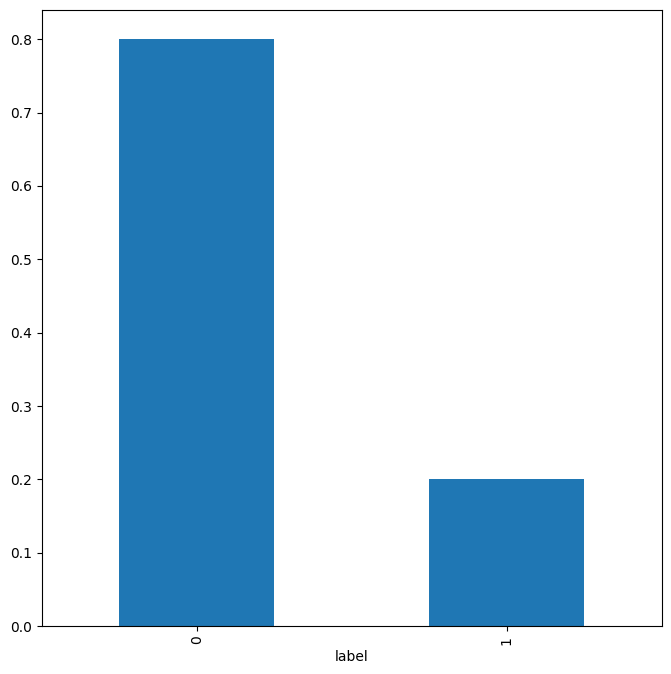

In [52]:
class_distr("label", df_wine)

### mushrooms dataset

class distribution:
label
0    3915
1    4208
Name: label, dtype: int64

 class distribution in %:
label
0    0.48
1    0.52
Name: label, dtype: float64


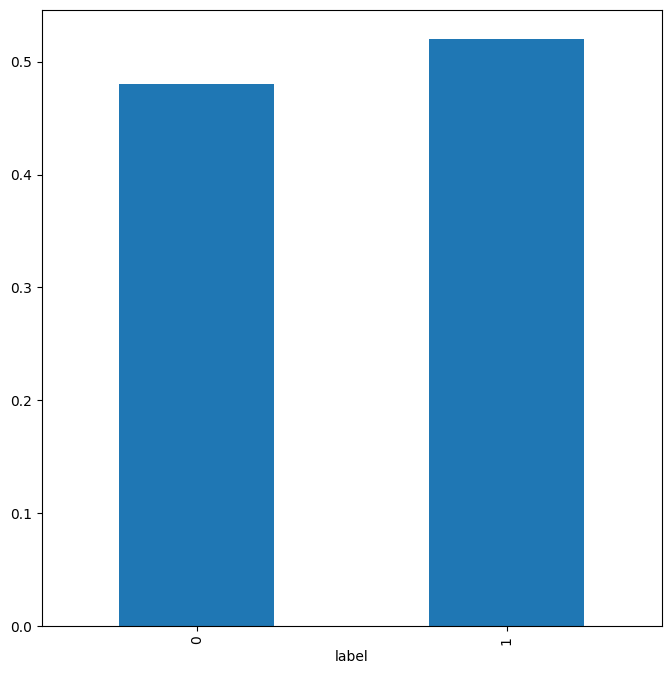

In [53]:
class_distr("label", df_mushrooms)

### Covid-19 dataset

class distribution:
label
0    110391
1     79195
Name: label, dtype: int64

 class distribution in %:
label
0    0.58
1    0.42
Name: label, dtype: float64


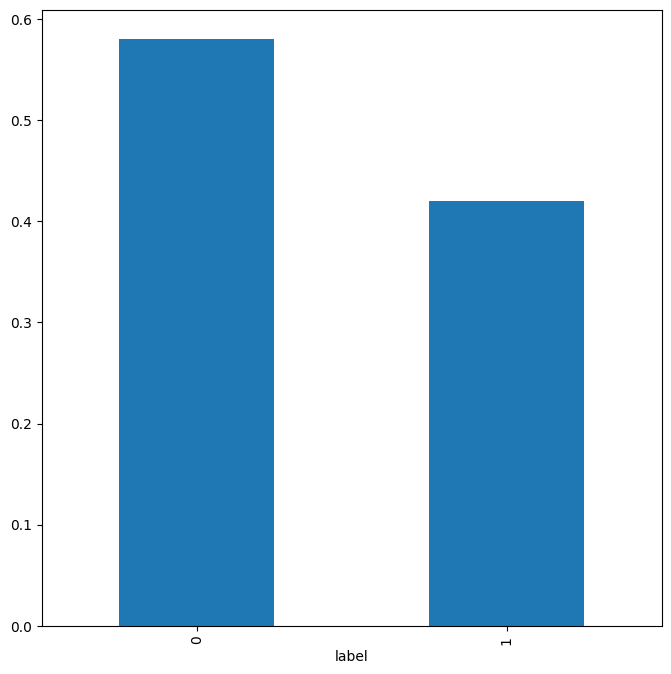

In [54]:
class_distr("label", df_covid)

### Bankrupcy dataset

class distribution:
label
0    6599
1     220
Name: label, dtype: int64

 class distribution in %:
label
0    0.97
1    0.03
Name: label, dtype: float64


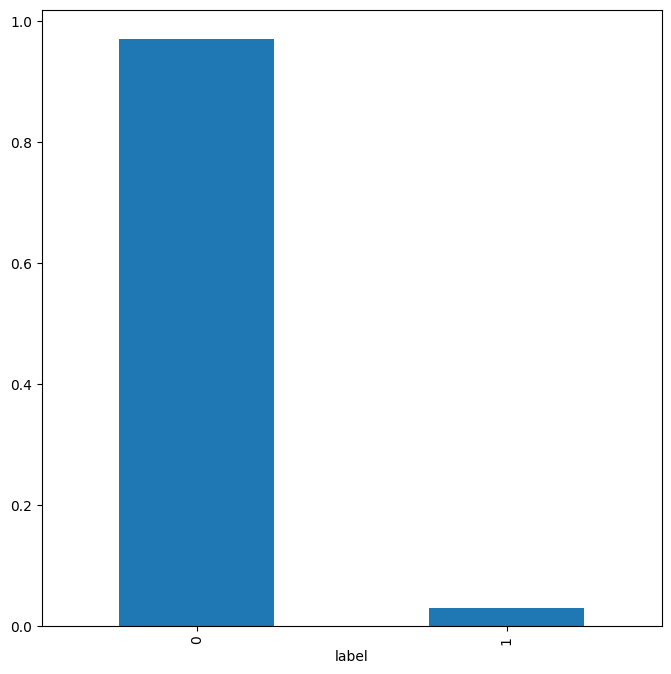

In [55]:
class_distr("label", df_bank)

### Tic-tac-toe dataset

class distribution:
label
0    332
1    625
Name: label, dtype: int64

 class distribution in %:
label
0    0.35
1    0.65
Name: label, dtype: float64


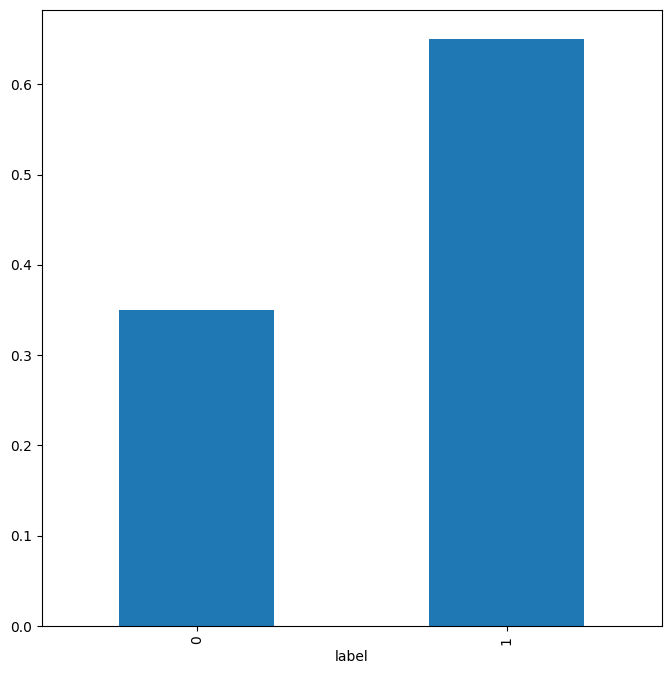

In [56]:
class_distr("label", df_tic)

## Select Features 

### bankrupcy dataset

In [57]:
y = df_bank['label']                      
list = ['label']
X = df_bank.drop(list, axis = 1)

In [58]:
def plot_part_corr(x, y, col_from, col_to):

    sns.set(style="whitegrid", palette="muted")
    data_bankrupcy = y
    data = x
    data_n_2 = (data - data.mean()) / (data.std())   

    data = pd.concat([data_bankrupcy,data_n_2.iloc[:,col_from:col_to]],axis=1)

    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr().round(2), annot=True)
    sns.set(rc={'figure.figsize':(25,15)})
    plt.tight_layout()
    plt.show()

#### correlation matrices

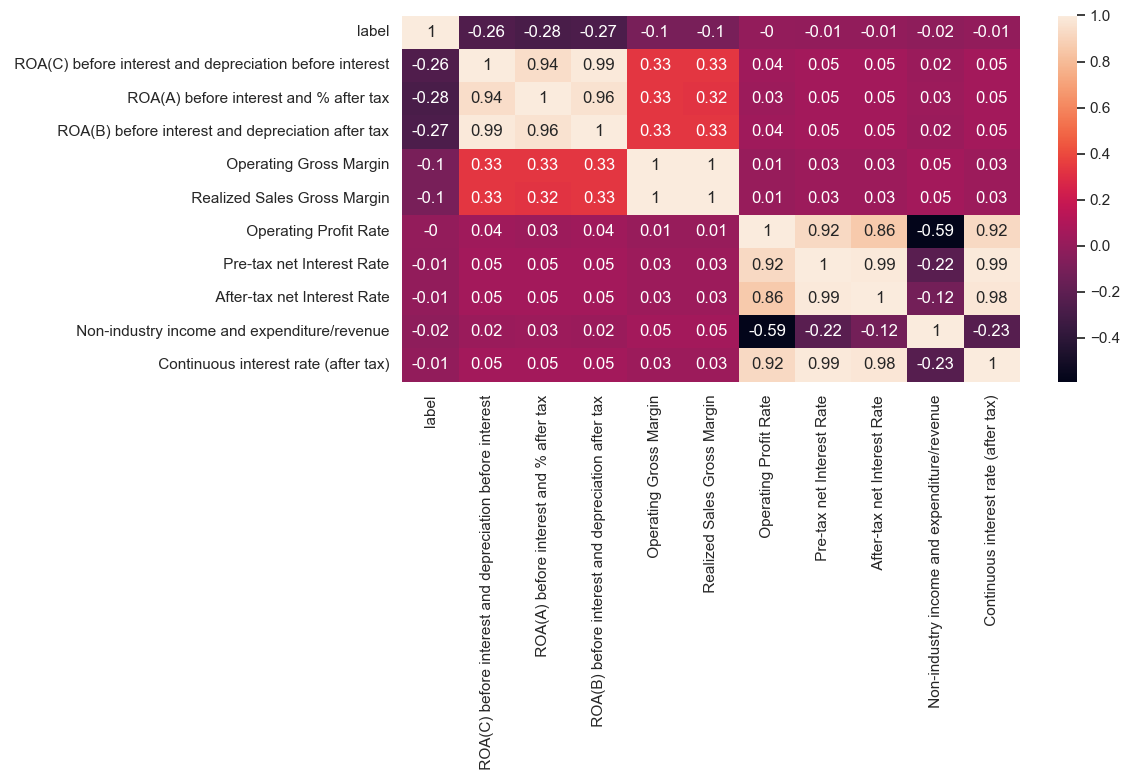

In [59]:
plot_part_corr(X, y, col_from=0, col_to=10)

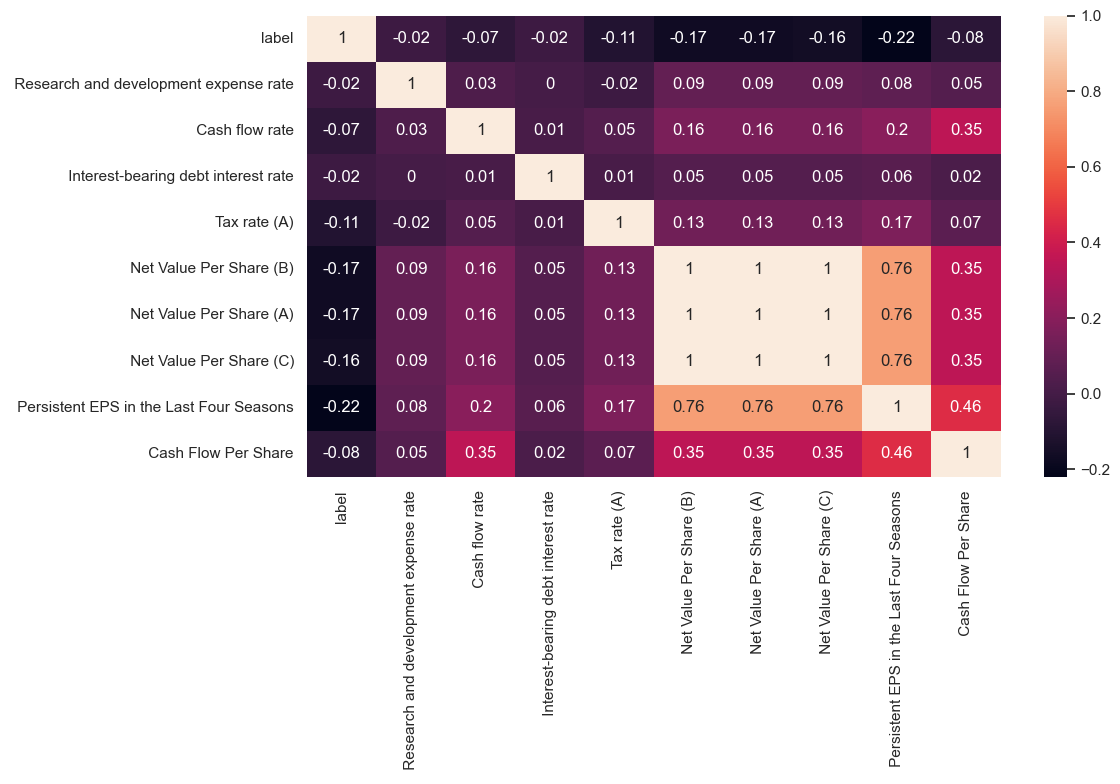

In [60]:
plot_part_corr(X, y, col_from=11, col_to=20)

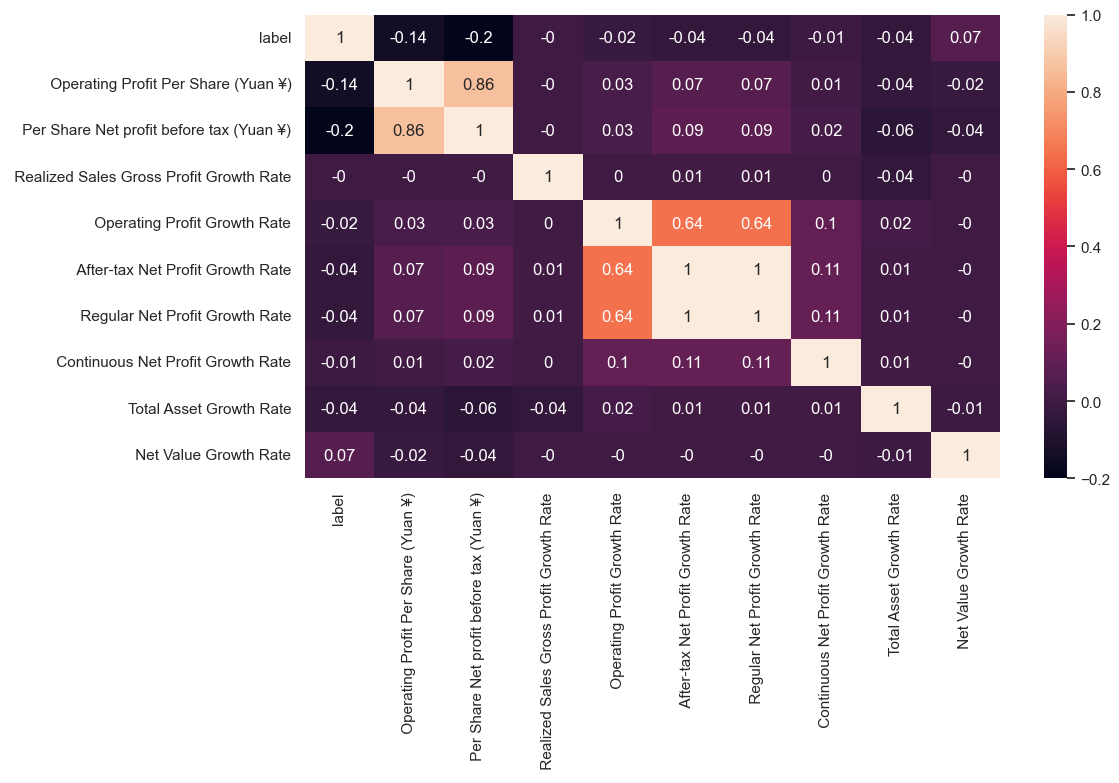

In [61]:
plot_part_corr(X, y, col_from=21, col_to=30)

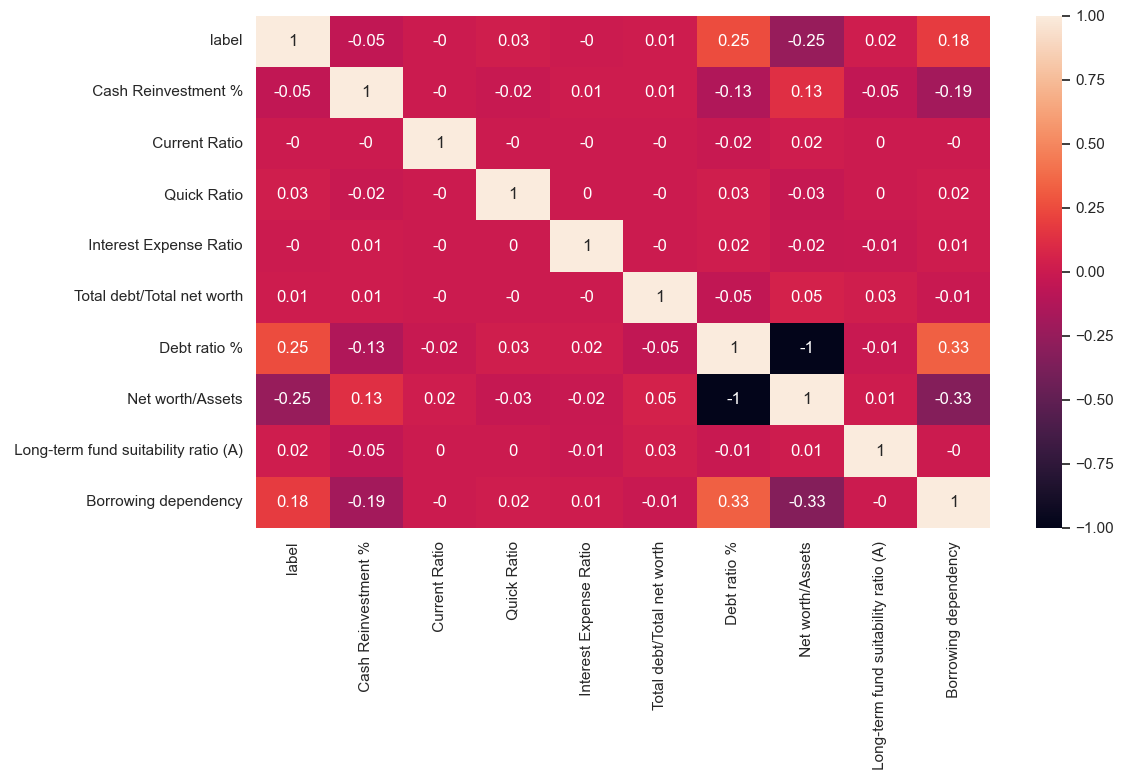

In [62]:
plot_part_corr(X, y, col_from=31, col_to=40)

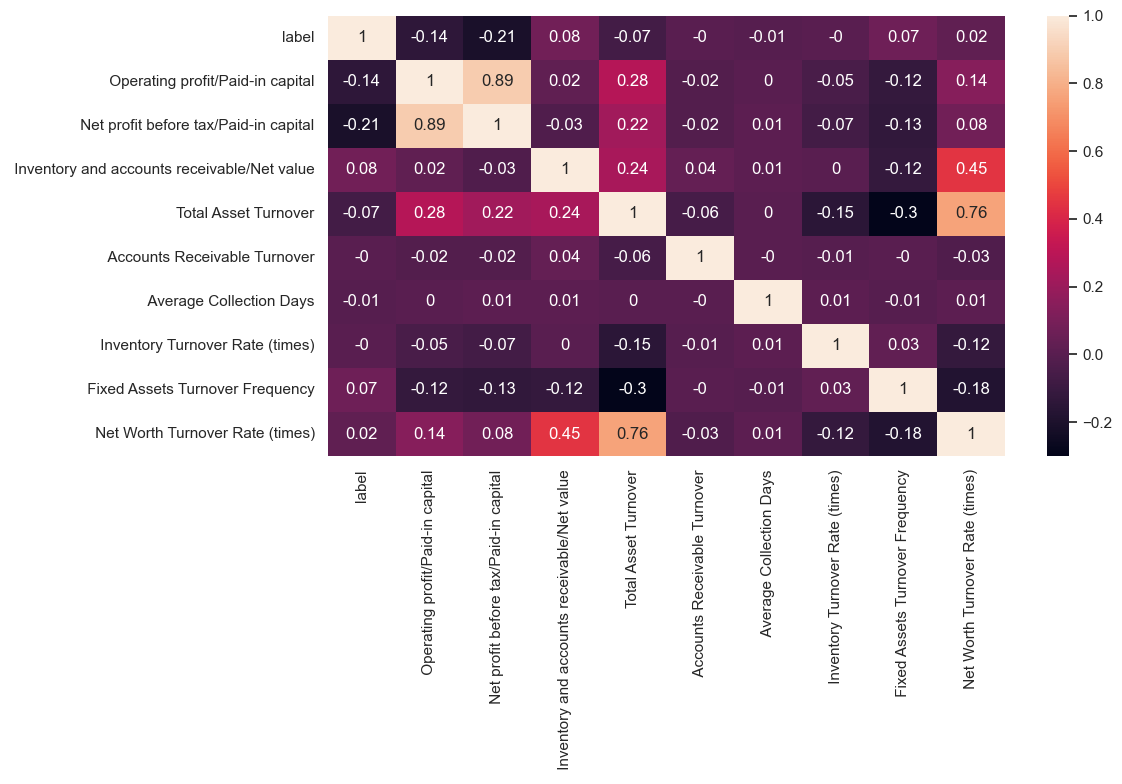

In [63]:
plot_part_corr(X, y, col_from=41, col_to=50)

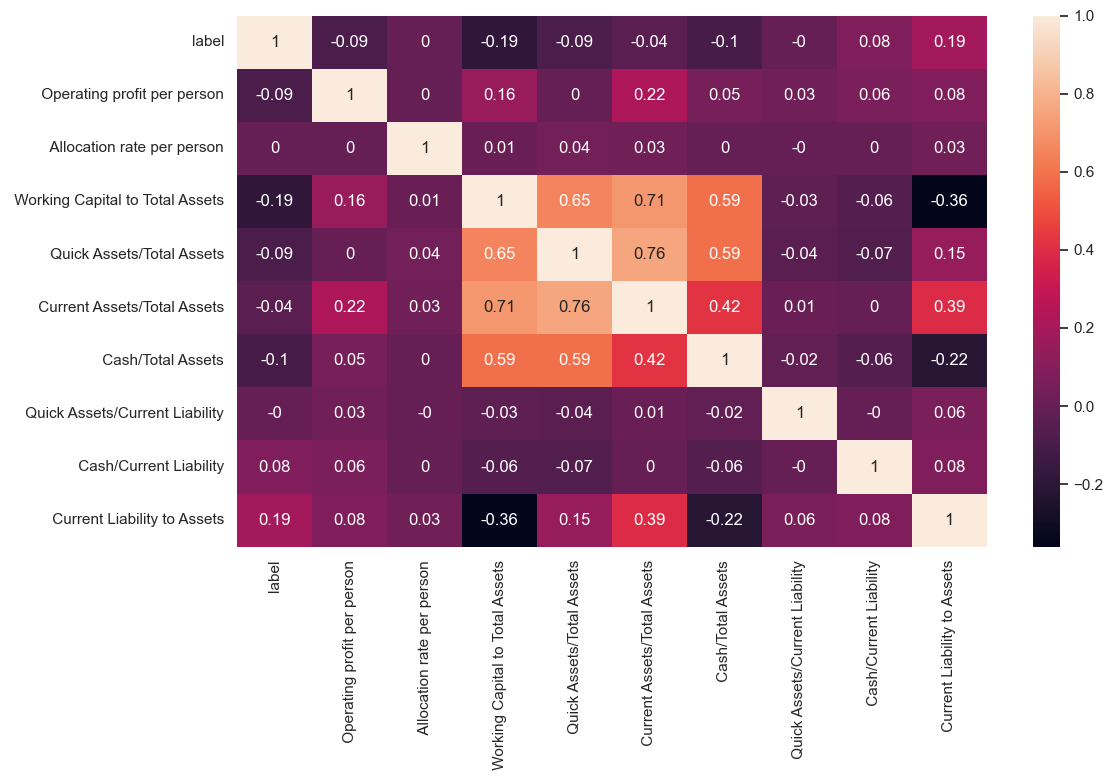

In [64]:
plot_part_corr(X, y, col_from=51, col_to=60)

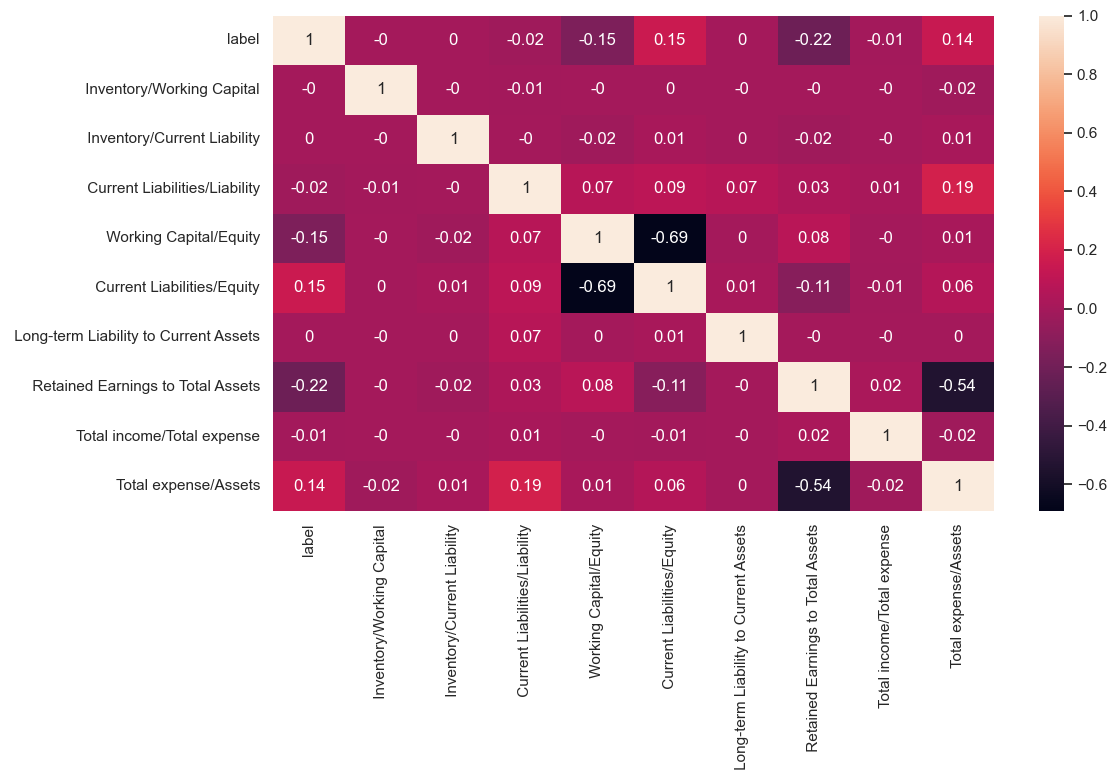

In [65]:
plot_part_corr(X, y, col_from=61, col_to=70)

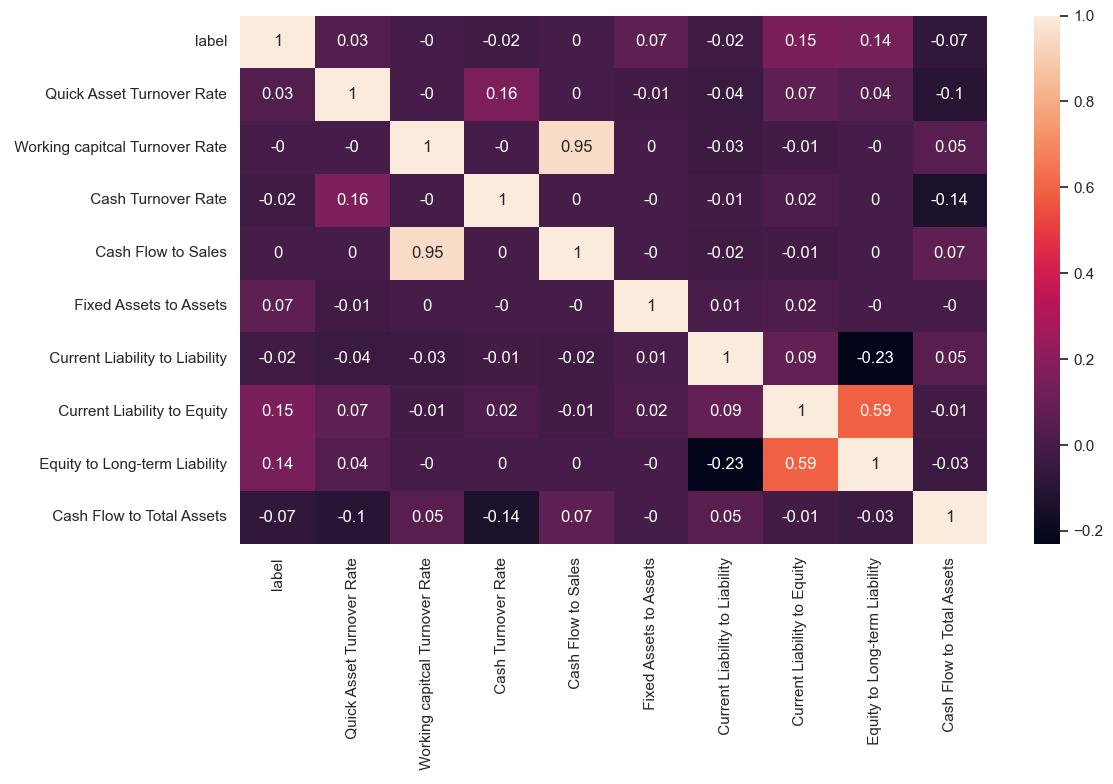

In [66]:
plot_part_corr(X, y, col_from=71, col_to=80)

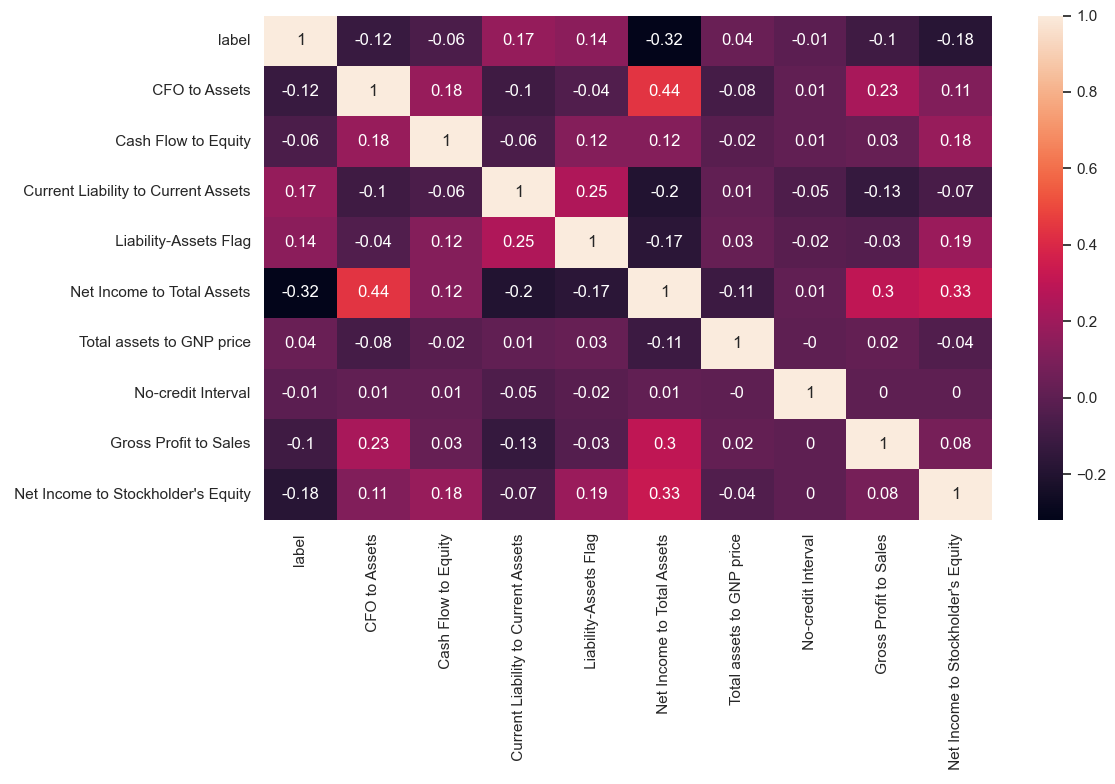

In [67]:
plot_part_corr(X, y, col_from=81, col_to=90)

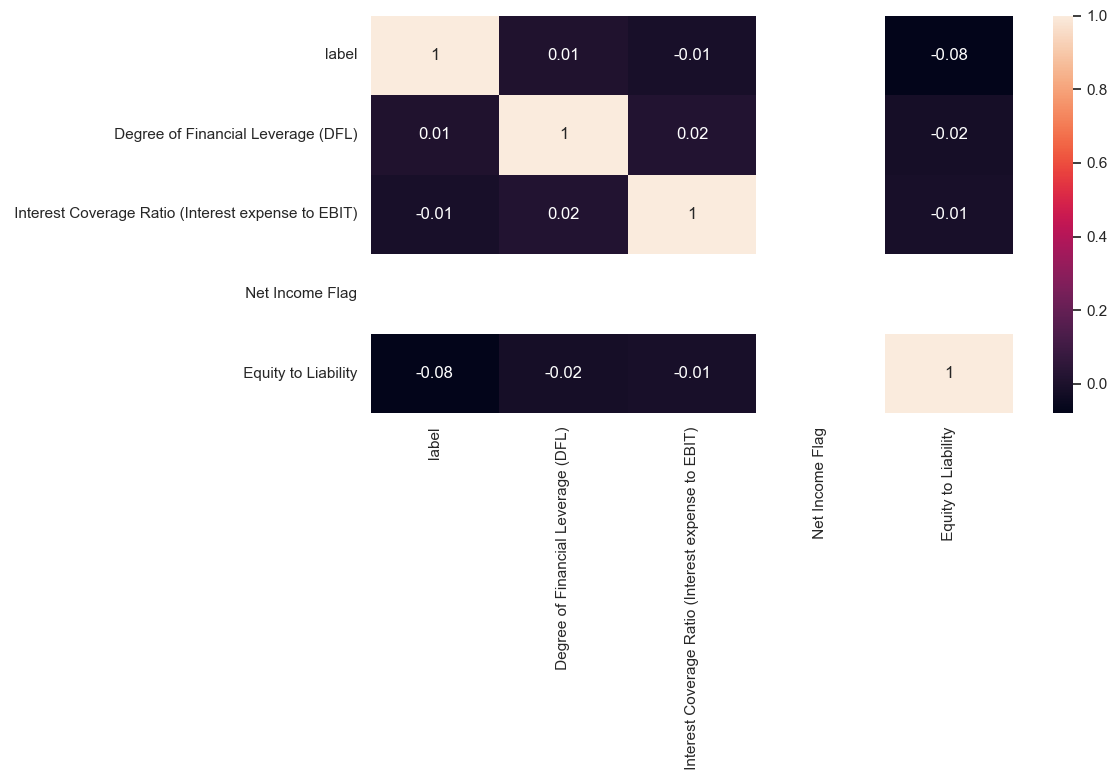

In [68]:
plot_part_corr(X, y, col_from=91, col_to=97)

#### manually chosen top features

In [69]:
top_features = [' Debt ratio %',' Liability to Equity', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Current Liability to Equity', ' Equity to Long-term Liability',
' Current Liabilities/Equity']

In [70]:
df_top_features = df_bank[top_features]

df_b_man = pd.concat([df_bank['label'],df_top_features],axis=1)

df_b_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   label                                 6819 non-null   int64  
 1    Debt ratio %                         6819 non-null   float64
 2    Liability to Equity                  6819 non-null   float64
 3    Current Liability to Current Assets  6819 non-null   float64
 4    Liability-Assets Flag                6819 non-null   int64  
 5    Current Liability to Equity          6819 non-null   float64
 6    Equity to Long-term Liability        6819 non-null   float64
 7    Current Liabilities/Equity           6819 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 426.3 KB


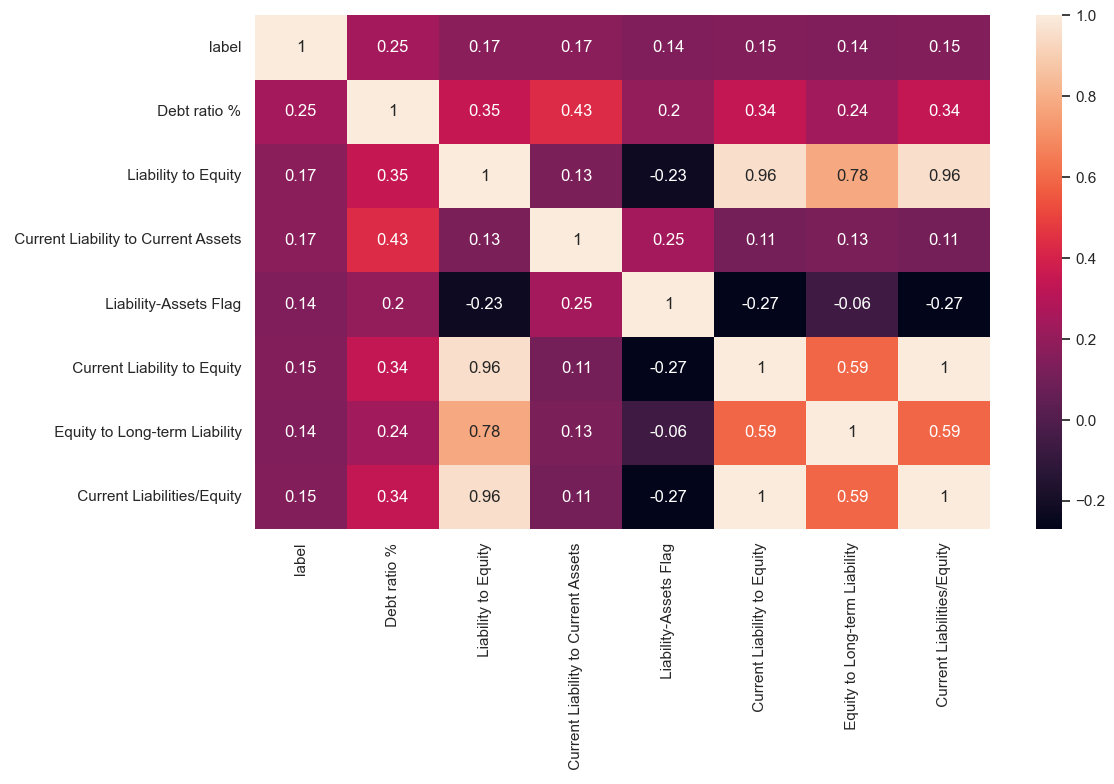

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_b_man.corr().round(2), annot=True)
sns.set(rc={'figure.figsize':(25,15)})
plt.tight_layout()
plt.show()

#### K Best chosen features

In [72]:
from sklearn.feature_selection import SelectKBest
k = 10

X = df_bank.copy().drop(["label"], axis = 1)
y = df_bank["label"]

feature_selector = SelectKBest(k='all')
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "fclassif_score"]
summary_stats = summary_stats.sort_values(by = "p_value", ascending=True)

selected_variables = summary_stats[:k]

selected_variables = selected_variables["input_variable"].tolist()

d:\OneDrive\OneDrive - Politechnika Warszawska\SEMY MGR\SEM 1\UMA\projekt\source\ForestSVM\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\OneDrive\OneDrive - Politechnika Warszawska\SEMY MGR\SEM 1\UMA\projekt\source\ForestSVM\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [73]:
selected_variables

[' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(C) before interest and depreciation before interest',
 ' Net worth/Assets',
 ' Debt ratio %',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 ' Net profit before tax/Paid-in capital',
 ' Per Share Net profit before tax (Yuan ¥)']

In [74]:
df_k_best = df_bank[selected_variables]

df_b_auto = pd.concat([df_bank['label'],df_k_best],axis=1)

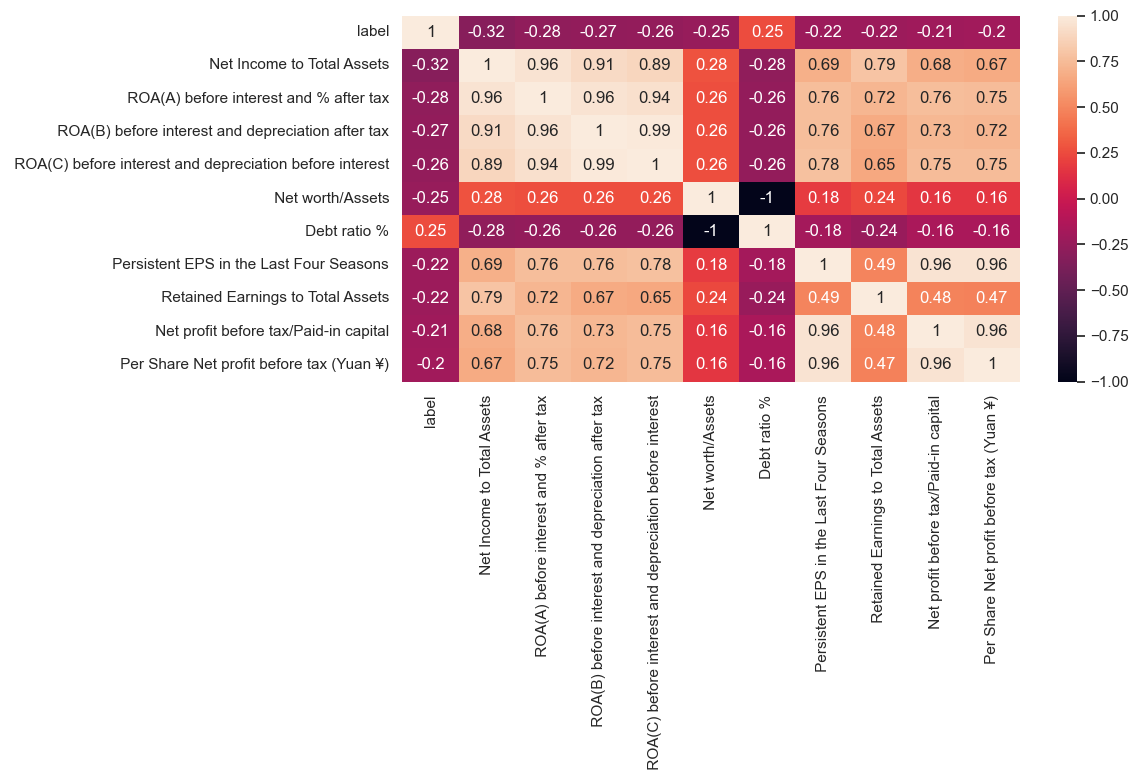

In [75]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_b_auto.corr().round(2), annot=True)
sns.set(rc={'figure.figsize':(25,15)})
plt.tight_layout()
plt.show()

#### final feature selection

In [76]:
df_bank = df_b_man.copy()
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   label                                 6819 non-null   int64  
 1    Debt ratio %                         6819 non-null   float64
 2    Liability to Equity                  6819 non-null   float64
 3    Current Liability to Current Assets  6819 non-null   float64
 4    Liability-Assets Flag                6819 non-null   int64  
 5    Current Liability to Equity          6819 non-null   float64
 6    Equity to Long-term Liability        6819 non-null   float64
 7    Current Liabilities/Equity           6819 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 426.3 KB


In [77]:
df_bank.head()

,label,Debt ratio %,Liability to Equity,Current Liability to Current Assets,Liability-Assets Flag,Current Liability to Equity,Equity to Long-term Liability,Current Liabilities/Equity
0,1,0.207576,0.290202,0.118250,0,0.339077,0.126549,0.339077
1,1,0.171176,0.283846,0.047775,0,0.329740,0.120916,0.329740
2,1,0.207516,0.290189,0.025346,0,0.334777,0.117922,0.334777
3,1,0.151465,0.281721,0.067250,0,0.331509,0.120760,0.331509
4,1,0.106509,0.278514,0.047725,0,0.330726,0.110933,0.330726


In [78]:
for col in df_bank.columns:
    unique = df_bank[col].unique()
    print(f"{df_bank[col].name}: {np.min(unique)} - {np.max(unique)}")

label: 0 - 1
 Debt ratio %: 0.0 - 1.0
 Liability to Equity: 0.0 - 1.0
 Current Liability to Current Assets: 0.0 - 1.0
 Liability-Assets Flag: 0 - 1
 Current Liability to Equity: 0.0 - 1.0
 Equity to Long-term Liability: 0.0 - 1.0
 Current Liabilities/Equity: 0.0 - 1.0


In [79]:
create_numerical_categories(df_b_auto, [' Liability-Assets Flag', 'label'], 32, normalize=True)

In [80]:
for col in df_b_auto.columns:
    unique = df_b_auto[col].unique()
    print(f"{df_b_auto[col].name}: {unique}")

label: [1 0]
 Net Income to Total Assets: [23, 26, 25, 24, 27, ..., 15, 30, 31, 32, 16]
Length: 21
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 ROA(A) before interest and % after tax: [14, 18, 16, 15, 19, ..., 4, 32, 27, 29, 5]
Length: 30
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 ROA(B) before interest and depreciation after tax: [13, 17, 16, 15, 14, ..., 4, 28, 32, 27, 31]
Length: 30
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 ROA(C) before interest and depreciation before interest: [12, 15, 14, 13, 17, ..., 25, 26, 32, 5, 27]
Length: 28
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 Net worth/Assets: [26, 27, 28, 29, 31, ..., 32, 23, 24, 1, 16]
Length: 13
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 Debt ratio %: [7, 6, 5, 4, 2, ..., 1, 10, 9, 32, 17]
Length: 13
Categories (32, int64): [1 < 2 < 3 < 4 ... 29 < 30 < 31 < 32]
 Persistent EPS in the Last Four Seasons: [6, 7, 8, 3, 9, ..., 18, 16, 

In [81]:
df_b_auto.head()

,label,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,1,23,14,13,12,26,7,6,29,5,5
1,1,26,18,17,15,27,6,7,30,6,6
2,1,25,16,16,14,26,7,6,30,5,5
3,1,24,15,15,13,28,5,7,30,5,5
4,1,26,18,17,15,29,4,7,30,6,6


In [82]:
df_bank.head()

,label,Debt ratio %,Liability to Equity,Current Liability to Current Assets,Liability-Assets Flag,Current Liability to Equity,Equity to Long-term Liability,Current Liabilities/Equity
0,1,0.207576,0.290202,0.118250,0,0.339077,0.126549,0.339077
1,1,0.171176,0.283846,0.047775,0,0.329740,0.120916,0.329740
2,1,0.207516,0.290189,0.025346,0,0.334777,0.117922,0.334777
3,1,0.151465,0.281721,0.067250,0,0.331509,0.120760,0.331509
4,1,0.106509,0.278514,0.047725,0,0.330726,0.110933,0.330726


## Testing ID3Tree and RandomForest

### Testing if models work on simple datasets

#### tic tac toe dataset

In [168]:
y = df_tic['label']                      
X = df_tic.drop('label', axis = 1)
X.head(2)

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,1,1,1,1,2,2,2,1,2
1,1,1,1,1,2,2,2,2,1


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### ID3 decision tree model

In [170]:
tree_classifier = DecisionTreeID3()
tree_classifier.fit(X_train,np.array(y_train))

In [171]:
y_test_pred = tree_classifier.predict_all(X_test)

Accuracy: 0.8625
 Macro precision: 0.839377406931964
 Macro recall: 0.8418181818181818 
 Macro f1-score: 0.8405765011373014


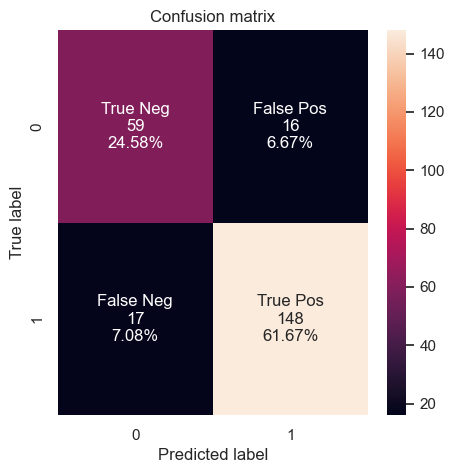

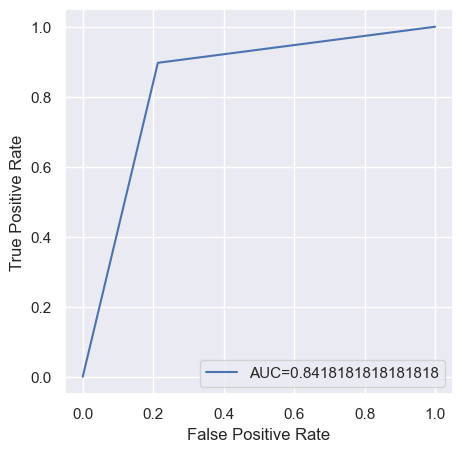

{'accuracy': 0.8625,
 'precision': 0.839377406931964,
 'recall': 0.8418181818181818,
 'f1-score': 0.8405765011373014}

In [172]:
metrics(y_test, y_test_pred)

##### Random forest model

In [173]:
rf_classifier = RFC(rand_features=False, n_estimators=50)
rf_classifier.fit(X_train, np.array(y_train))

Accuracy: 0.9708333333333333
 Macro precision: 0.9752100840336135
 Macro recall: 0.956969696969697 
 Macro f1-score: 0.9654143077714875


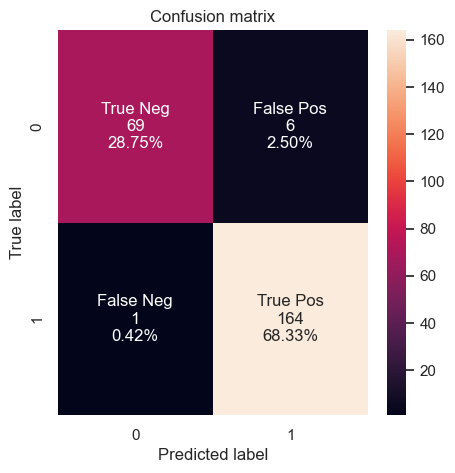

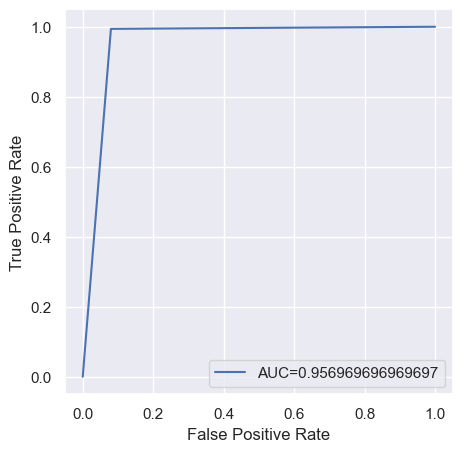

{'accuracy': 0.9708333333333333,
 'precision': 0.9752100840336135,
 'recall': 0.956969696969697,
 'f1-score': 0.9654143077714875}

In [174]:
y_test_pred = rf_classifier.predict(X_test)
metrics(y_test, y_test_pred)

##### comparison with sklearn

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.8708333333333333
 Macro precision: 0.8521825396825398
 Macro recall: 0.8442424242424242 
 Macro f1-score: 0.8480112765827051


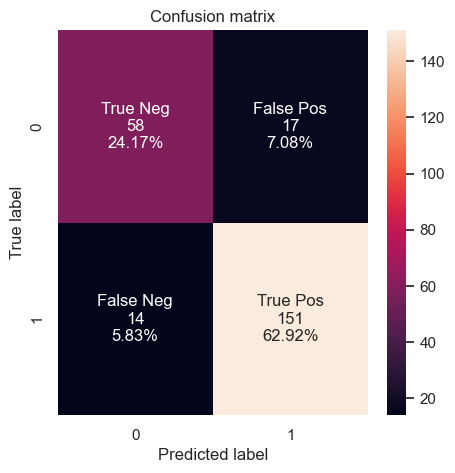

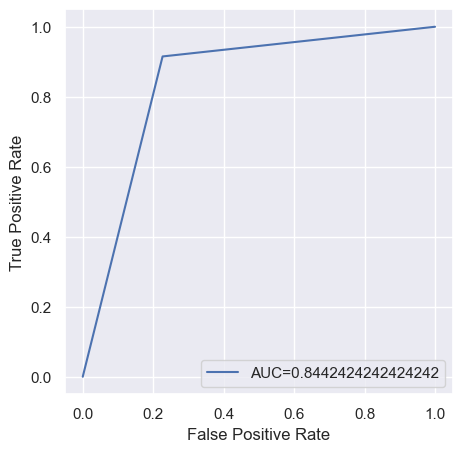

{'accuracy': 0.8708333333333333,
 'precision': 0.8521825396825398,
 'recall': 0.8442424242424242,
 'f1-score': 0.8480112765827051}

In [166]:
skl_tree_classifier = DecisionTreeClassifier()
skl_tree_classifier.fit(X_train,np.array(y_train))

y_test_pred = skl_tree_classifier.predict(X_test)
metrics(y_test, y_test_pred)

Accuracy: 0.9583333333333334
 Macro precision: 0.9581631802650221
 Macro recall: 0.9442424242424242 
 Macro f1-score: 0.9507833647772947


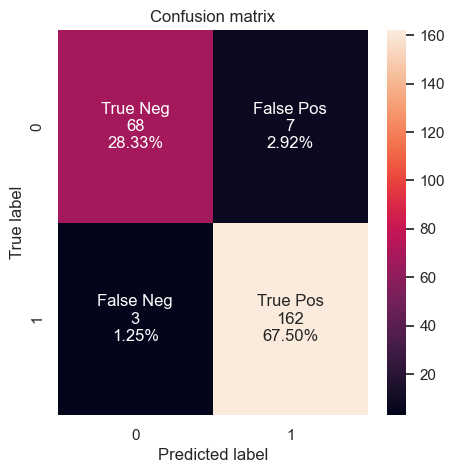

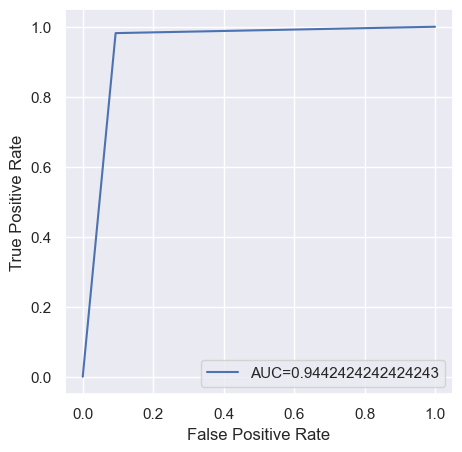

{'accuracy': 0.9583333333333334,
 'precision': 0.9581631802650221,
 'recall': 0.9442424242424242,
 'f1-score': 0.9507833647772947}

In [175]:
skl_forest_classifier = RandomForestClassifier(n_estimators=50)
skl_forest_classifier.fit(X_train,np.array(y_train))

y_test_pred = skl_forest_classifier.predict(X_test)
metrics(y_test, y_test_pred)

#### mushrooms dataset

In [65]:
y = df_mushrooms['label']                      
X = df_mushrooms.drop('label', axis = 1)
X.head(2)

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m


In [49]:
y.head(2)

0    1
1    1
Name: label, dtype: int64

##### ID3 decision tree model

In [191]:
tree_classifier = DecisionTreeID3()
tree_classifier.fit(X_train,np.array(y_train))

Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


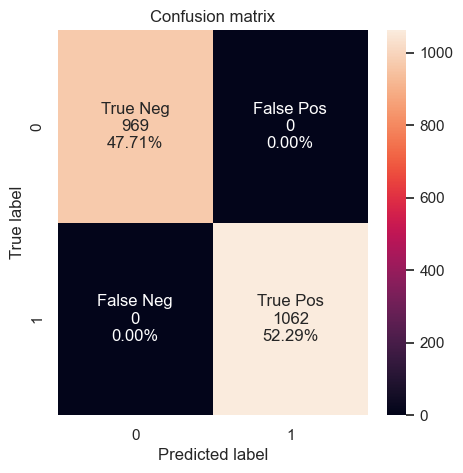

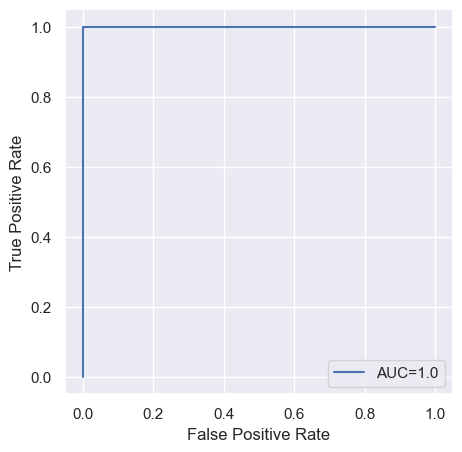

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}

In [192]:
y_test_pred = tree_classifier.predict_all(X_test)
metrics(y_test, y_test_pred)

##### Random forest model

In [193]:
rf_classifier = RFC(rand_features=False, n_estimators=5)
rf_classifier.fit(X_train, np.array(y_train))

Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


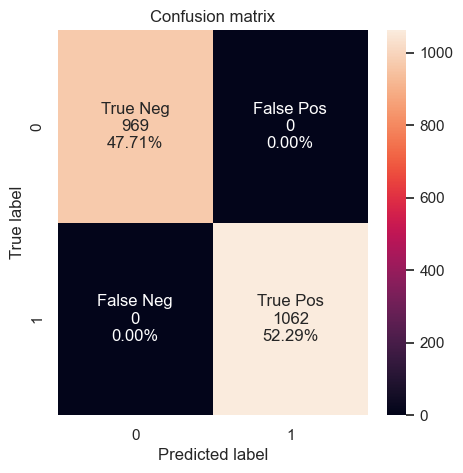

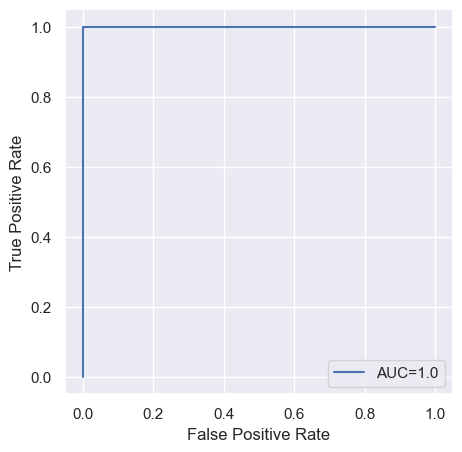

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}

In [194]:
y_test_pred = rf_classifier.predict(X_test)
metrics(y_test, y_test_pred)

In [66]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for col in df_mushrooms.columns:
    df_mushrooms[col] = enc.fit_transform(np.array(df_mushrooms[col]).reshape(-1, 1))

In [67]:
y = df_mushrooms['label']                      
X = df_mushrooms.drop('label', axis = 1)
X.head(2)

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
1,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,...,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### comparison with sklearn

Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


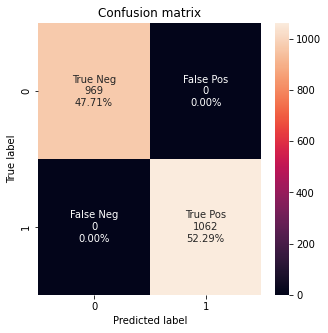

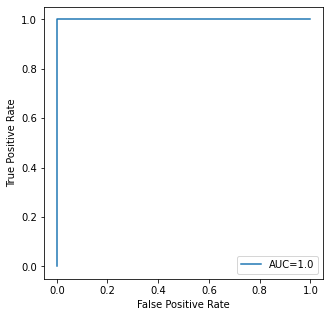

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}

In [69]:
skl_tree_classifier = DecisionTreeClassifier()
skl_tree_classifier.fit(X_train,np.array(y_train))

y_test_pred = skl_tree_classifier.predict(X_test)
metrics(y_test, y_test_pred)

Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


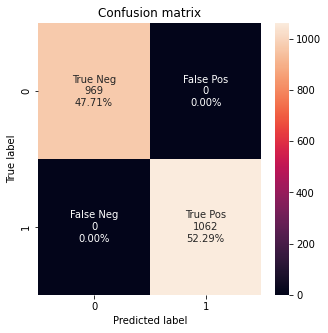

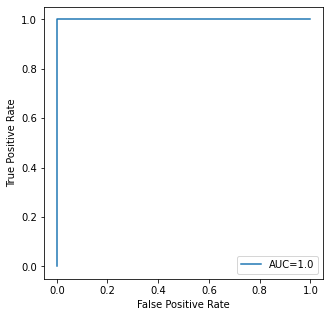

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}

In [70]:
skl_forest_classifier = RandomForestClassifier(n_estimators=50)
skl_forest_classifier.fit(X_train,np.array(y_train))

y_test_pred = skl_forest_classifier.predict(X_test)
metrics(y_test, y_test_pred)

### Covid 19 dataset

In [83]:
y = df_covid['label'].copy()                 
X = df_covid.drop('label', axis = 1)
X.head(2)

,USMER,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,4


#### ID3 decision tree model

Results for Fold 1
Accuracy: 0.6649876048314785
 Macro precision: 0.6533041340733821
 Macro recall: 0.6450463026771791 
 Macro f1-score: 0.6467886073658262


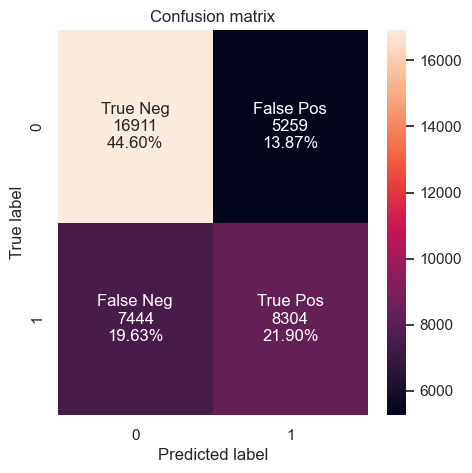

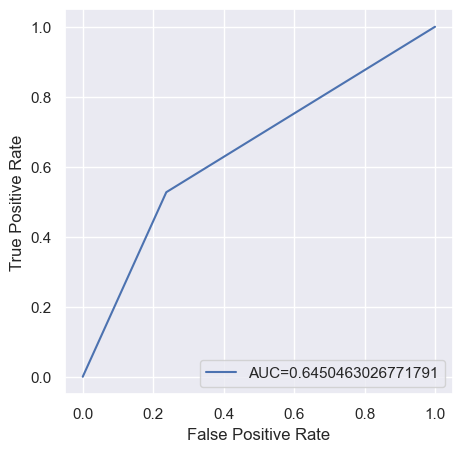

Results for Fold 2
Accuracy: 0.6628161510668038
 Macro precision: 0.6516806663145798
 Macro recall: 0.643428456116143 
 Macro f1-score: 0.6450542012283151


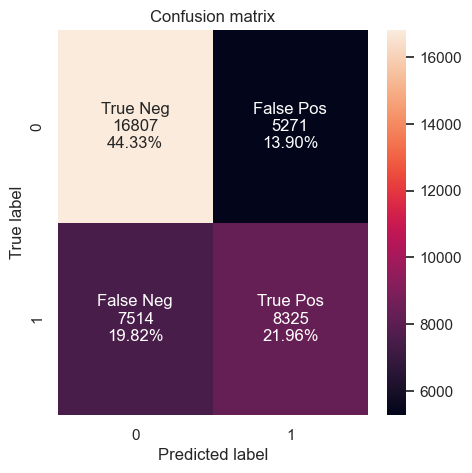

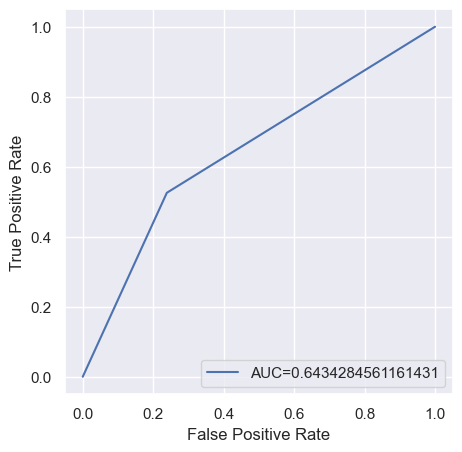

Results for Fold 3
Accuracy: 0.665295250151647
 Macro precision: 0.6536117893168285
 Macro recall: 0.645282109991772 
 Macro f1-score: 0.6470361315683821


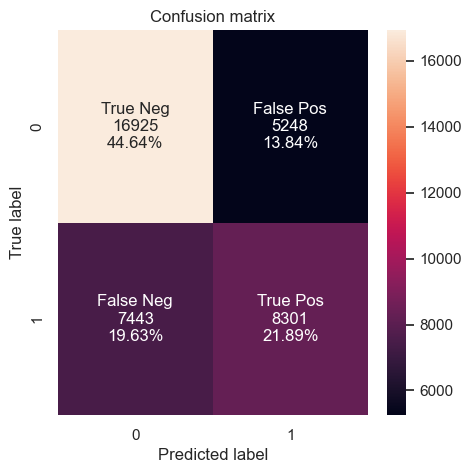

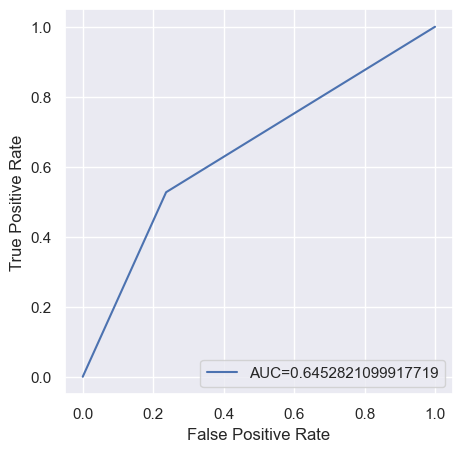

Results for Fold 4
Accuracy: 0.6624205501490097
 Macro precision: 0.6519972035254646
 Macro recall: 0.6435954109833748 
 Macro f1-score: 0.6451412094036948


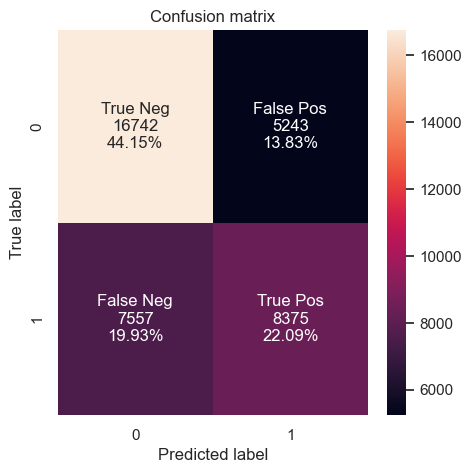

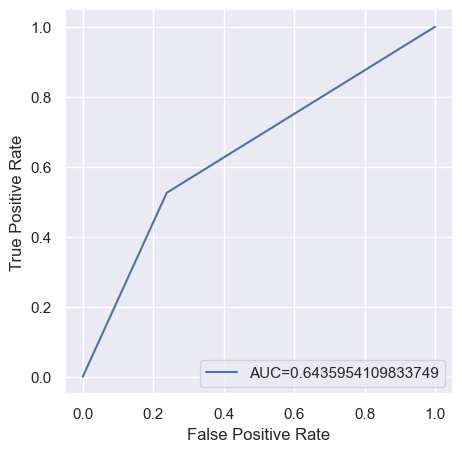

Results for Fold 5
Accuracy: 0.6633172455626763
 Macro precision: 0.6529690157320183
 Macro recall: 0.6445414774789673 
 Macro f1-score: 0.6461097732766743


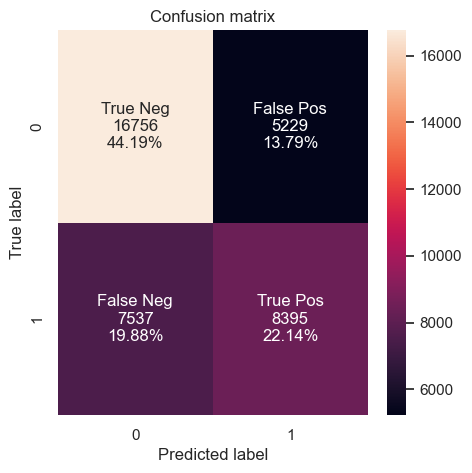

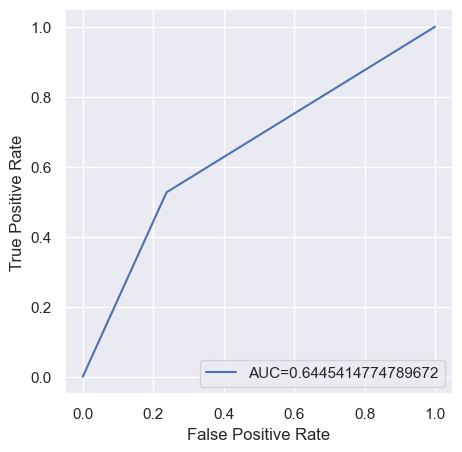


 Results for all 5 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.663767   0.652713  0.644379  0.646026
1   std  0.001161   0.000748  0.000749  0.000817
2   min  0.662421   0.651681  0.643428  0.645054
3   max  0.665295   0.653612  0.645282  0.647036


In [207]:
tree_classifier = DecisionTreeID3()
k_fold(X, y, model = tree_classifier, k = 5)

Results for Fold 1
Accuracy: 0.6453663167888601
 Macro precision: 0.6326388827094471
 Macro recall: 0.6285519799952546 
 Macro f1-score: 0.6296925959681077


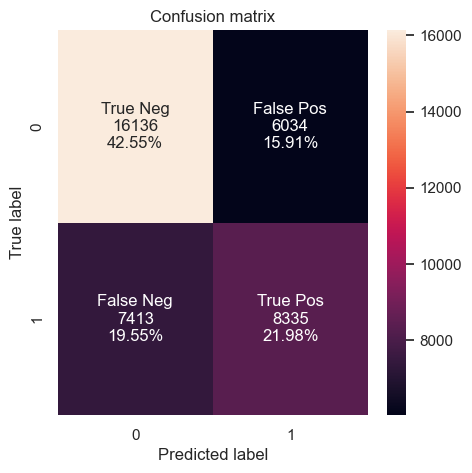

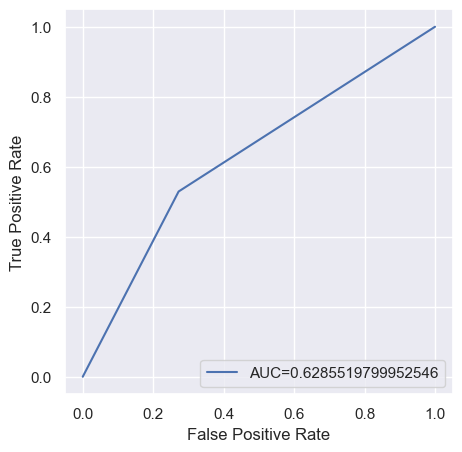

Results for Fold 2
Accuracy: 0.6580689400532742
 Macro precision: 0.6466196262361406
 Macro recall: 0.6408595932433871 
 Macro f1-score: 0.6422881822775446


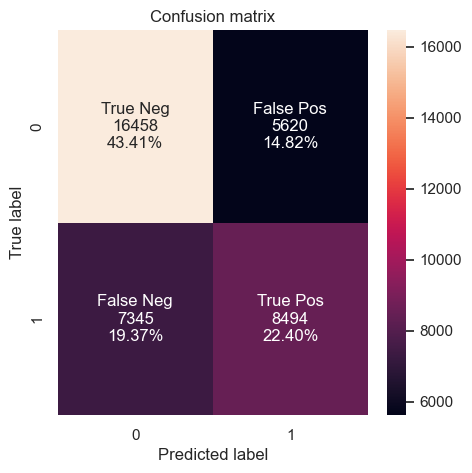

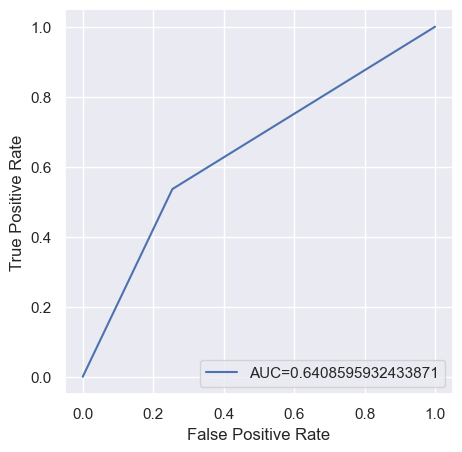

Results for Fold 3
Accuracy: 0.6660073318036764
 Macro precision: 0.6543986201685794
 Macro recall: 0.6481469631682347 
 Macro f1-score: 0.6497834221744119


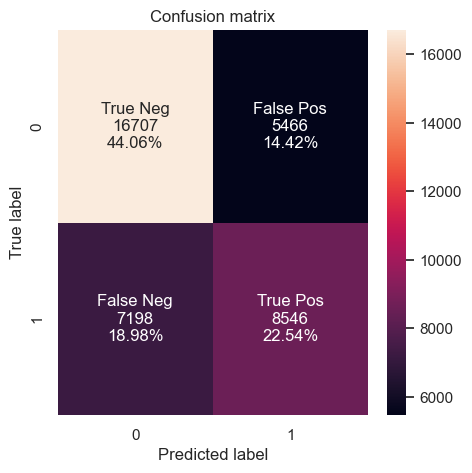

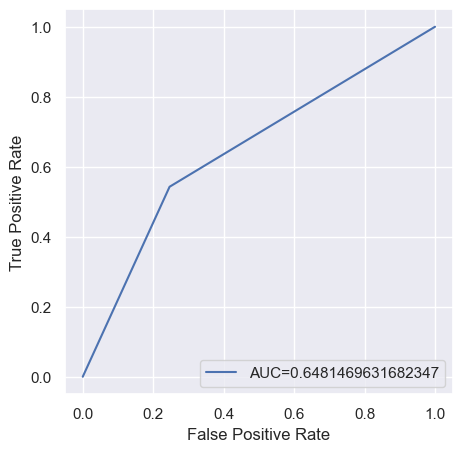

Results for Fold 4
Accuracy: 0.6656908510694411
 Macro precision: 0.6554454793136939
 Macro recall: 0.6492150700632339 
 Macro f1-score: 0.6507479307451876


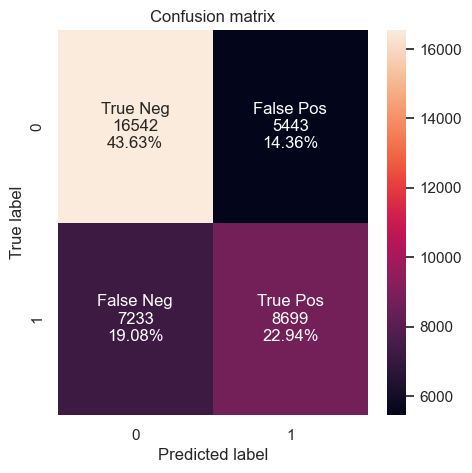

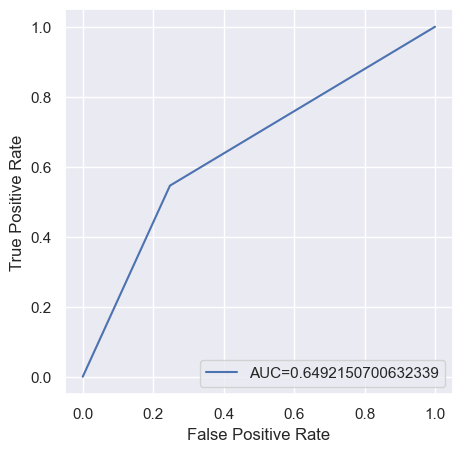

Results for Fold 5
Accuracy: 0.6699105941925785
 Macro precision: 0.6599609130144157
 Macro recall: 0.6533550695413433 
 Macro f1-score: 0.6549827693919913


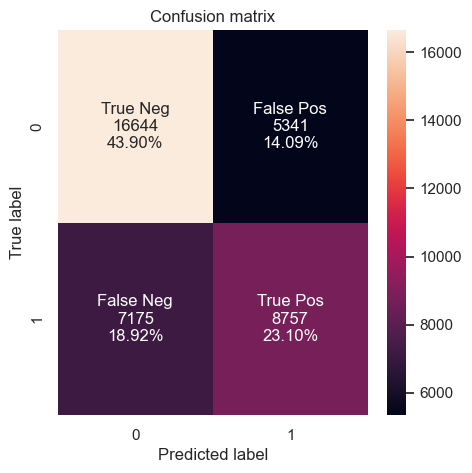

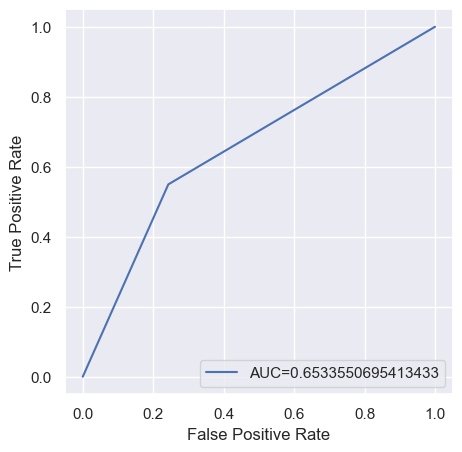


 Results for all 5 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.661009   0.649813  0.644026  0.645499
1   std  0.008712   0.009601  0.008723  0.008899
2   min  0.645366   0.632639  0.628552  0.629693
3   max  0.669911   0.659961  0.653355  0.654983


In [84]:
k_fold(X, y, model = RFC(n_estimators = 10, rand_features = False), k = 5)

Results for Fold 1
Accuracy: 0.6437274511045002
 Macro precision: 0.6312783009689359
 Macro recall: 0.6266448623574534 
 Macro f1-score: 0.6277897608320311


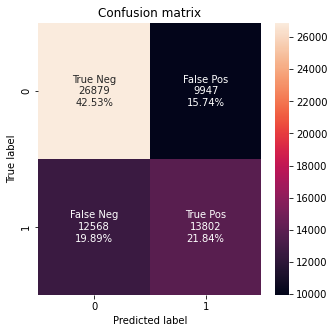

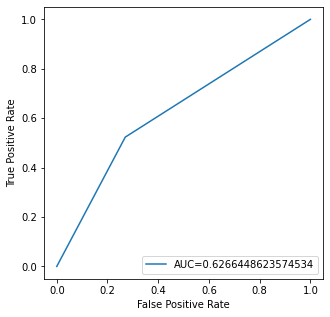

Results for Fold 2
Accuracy: 0.6624574729013372
 Macro precision: 0.651019911394616
 Macro recall: 0.6455355612037241 
 Macro f1-score: 0.6470196835120006


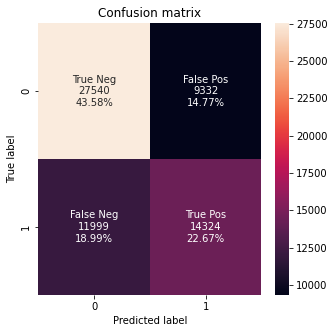

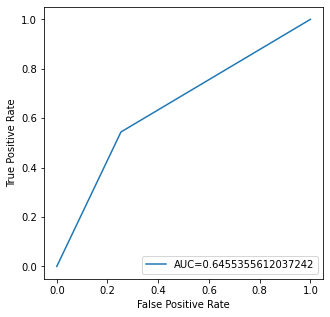

Results for Fold 3
Accuracy: 0.6686446712556373
 Macro precision: 0.658412959061206
 Macro recall: 0.6509682033305724 
 Macro f1-score: 0.6526496146802148


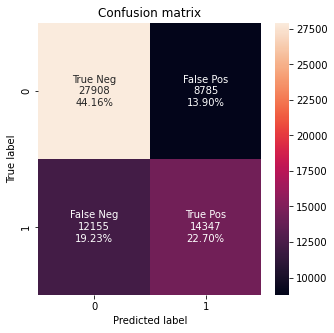

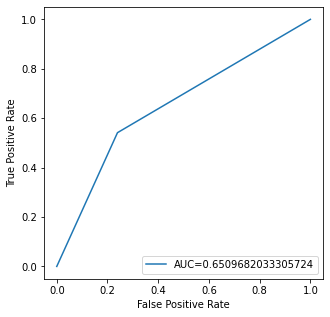


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.658277   0.646904  0.641050  0.642486
1   std  0.010593   0.011454  0.010424  0.010643
2   min  0.643727   0.631278  0.626645  0.627790
3   max  0.668645   0.658413  0.650968  0.652650


In [ ]:
k_fold(X, y, RFC(n_estimators=50, rand_features=False))

### Bankrupcy dataset

In [ ]:
y = df_b_auto['label'].copy()                 
X = df_b_auto.drop('label', axis = 1)
X.head(2)

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Net worth/Assets,Debt ratio %,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥)
0,23,14,13,12,26,7,6,29,5,5
1,26,18,17,15,27,6,7,30,6,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(df_b_auto, df_b_auto['label']):
    strat_X_train = X.loc[train_index]
    strat_X_test = X.loc[test_index]
    strat_y_train = y[train_index]
    strat_y_test = y[test_index]

Results for Fold 1
Accuracy: 0.9552785923753666
 Macro precision: 0.6618089340999558
 Macro recall: 0.609269297970521 
 Macro f1-score: 0.6296365538269791


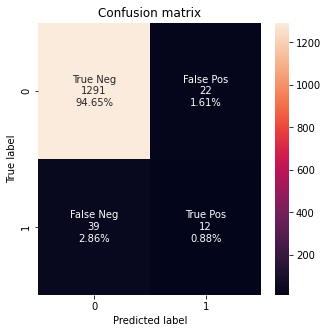

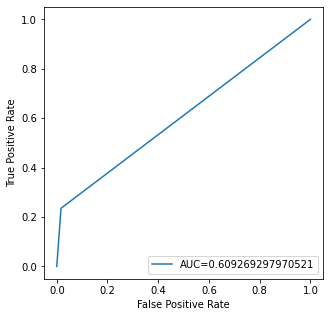

Results for Fold 2
Accuracy: 0.969208211143695
 Macro precision: 0.7160953800298062
 Macro recall: 0.6204682779456193 
 Macro f1-score: 0.6534133533383346


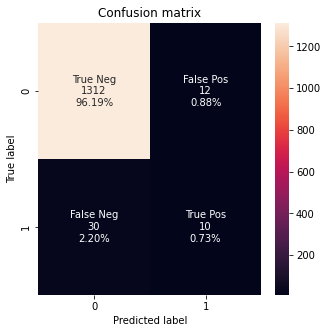

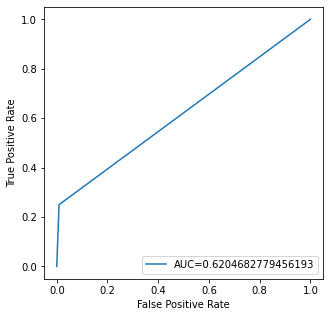

Results for Fold 3
Accuracy: 0.9574780058651027
 Macro precision: 0.5748038267225626
 Macro recall: 0.5748038267225626 
 Macro f1-score: 0.5748038267225626


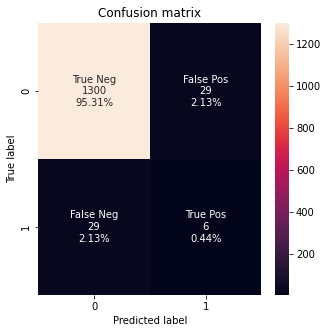

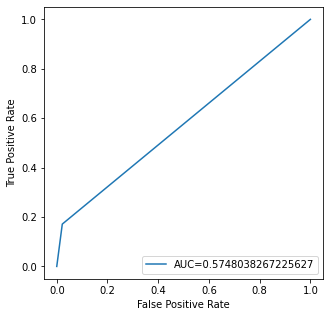

Results for Fold 4
Accuracy: 0.9567448680351907
 Macro precision: 0.559375
 Macro recall: 0.526889057366692 
 Macro f1-score: 0.5350761142725093


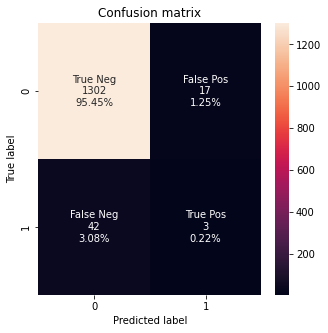

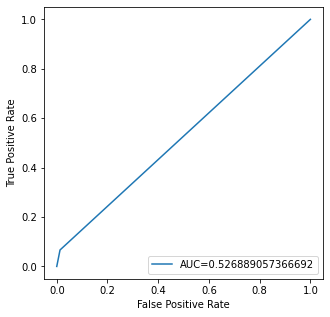

Results for Fold 5
Accuracy: 0.9567131327953045
 Macro precision: 0.6520380095023756
 Macro recall: 0.5944304662504272 
 Macro f1-score: 0.6154375863767437


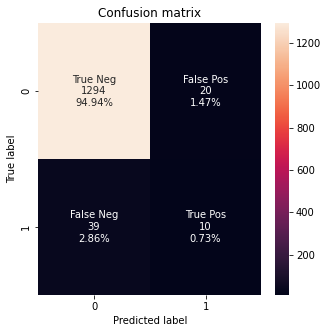

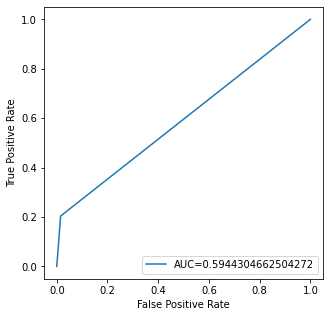


 Results for all 5 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.959085   0.632824  0.585172  0.601673
1   std  0.005112   0.058146  0.032914  0.041966
2   min  0.955279   0.559375  0.526889  0.535076
3   max  0.969208   0.716095  0.620468  0.653413


In [ ]:
k_fold(X, y, model = DecisionTreeID3(), k = 5)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(kernel='poly',degree=6)
svm_clf.fit(X_train, np.array(y_train))

SVC(degree=6, kernel='poly')

Accuracy: 0.9665689149560117
 Macro precision: 0.983274647887324
 Macro recall: 0.5086206896551724 
 Macro f1-score: 0.5084442286390604


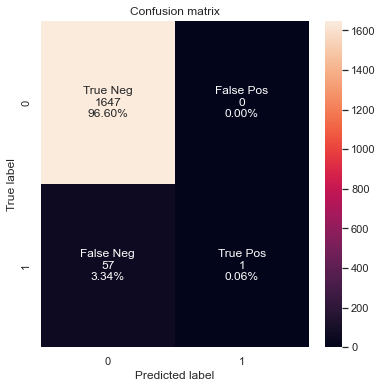

In [ ]:
y_test_pred = svm_clf.predict(X_test)
metrics(y_test, y_test_pred)

### Test modelu z sklearn bez stratify split

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, np.array(y_train))

RandomForestClassifier()

Accuracy: 0.9683284457478006
 Macro precision: 0.8185666469777515
 Macro recall: 0.5677511881581978 
 Macro f1-score: 0.6062018819503849


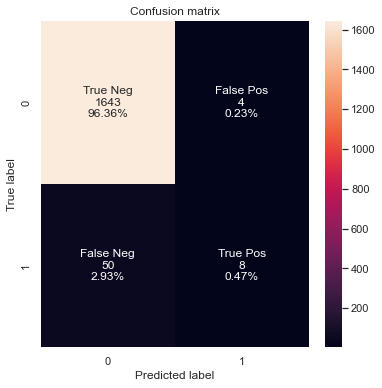

In [ ]:
y_test_pred = rf_classifier.predict(X_test)
metrics(y_test, y_test_pred)

### Test modelu z sklearn ze stratify

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(strat_X_train, np.array(strat_y_train))

RandomForestClassifier()

Accuracy: 0.9612903225806452
 Macro precision: 0.6414492634351082
 Macro recall: 0.5757575757575758 
 Macro f1-score: 0.5972210291212094


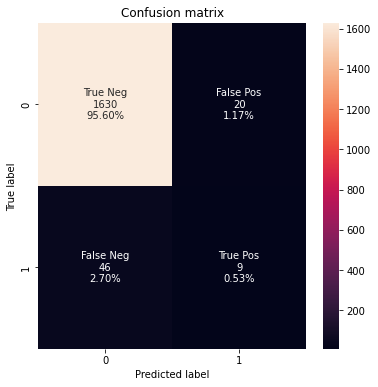

In [ ]:
y_test_pred = rf_classifier.predict(strat_X_test)
metrics(strat_y_test, y_test_pred)

#### Grid search parametrów dla lasu losowego 

In [ ]:
param_grid = [{'n_estimators': [10, 30], 'rand_features': [True, False], 'combine_SVM_prop': [0.0, 0.2, 0.5, 0.8]}]

forestsvm_clf = RFC()
grid_search = GridSearchCV(forestsvm_clf, param_grid, cv=2, scoring='f1', return_train_score=True)
grid_search.fit(X, np.array(y))

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'combine_SVM_prop': [0.0, 0.2, 0.5, 0.8],
                          'n_estimators': [10, 30],
                          'rand_features': [True, False]}],
             return_train_score=True, scoring='f1')

In [ ]:
grid_search.best_params_

{'combine_SVM_prop': 0.0, 'n_estimators': 10, 'rand_features': False}

Accuracy: 0.9829912023460411
 Macro precision: 0.9586069651741294
 Macro recall: 0.7539393939393939 
 Macro f1-score: 0.8250508624502433


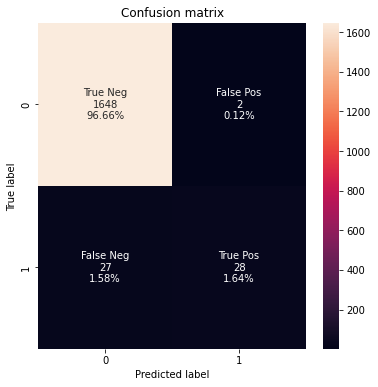

In [ ]:
y_test_pred = grid_search.best_estimator_.predict(strat_X_test)
metrics(strat_y_test, y_test_pred)

#### k fold for best hyperparameters

Results for Fold 1
Accuracy: 0.9604047514298284
 Macro precision: 0.6618082932865241
 Macro recall: 0.5633391907722808 
 Macro f1-score: 0.5880654359172628


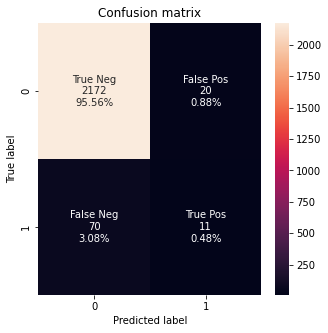

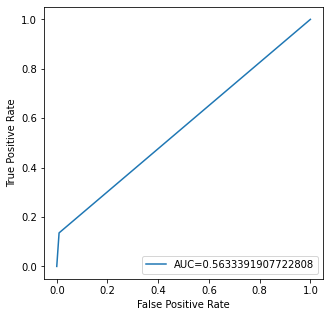

Results for Fold 2
Accuracy: 0.9771227452705675
 Macro precision: 0.8239708723435875
 Macro recall: 0.6590289024087772 
 Macro f1-score: 0.7115538548642159


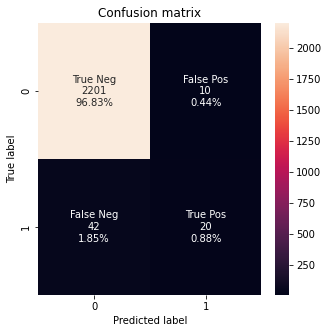

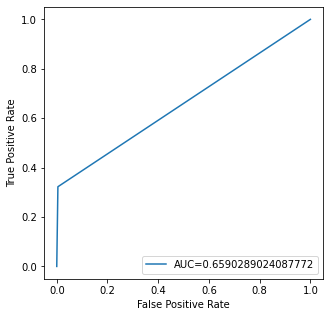

Results for Fold 3
Accuracy: 0.98152221733392
 Macro precision: 0.9546780750065565
 Macro recall: 0.7460701866439572 
 Macro f1-score: 0.8172913508796105


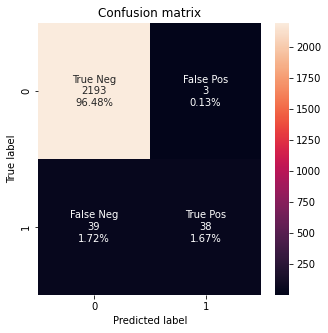

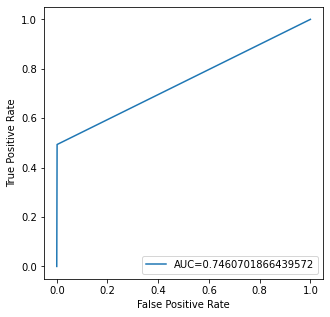


 Results for all 3 folds:
   info  accuracy  precision    recall  f1-score
0  mean  0.973017   0.813486  0.656146  0.705637
1   std  0.009097   0.119793  0.074627  0.093675
2   min  0.960405   0.661808  0.563339  0.588065
3   max  0.981522   0.954678  0.746070  0.817291


In [ ]:
k_fold(X, y, RFC(n_estimators=10, rand_features=False))